## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [77]:
## 確認硬體資源
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [78]:
import os
import keras
import numpy as np
# Try to enable GPU (optional)


In [79]:
train, test = keras.datasets.cifar10.load_data()

In [80]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)) * 2 - 1
    if flatten:
        x = x.reshape((len(x),-1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [81]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [82]:
Dense = keras.layers.Dense
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i))(input_layer)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i))(x)

    out = Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [83]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [84]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [85]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [86]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.7256 - acc: 0.3857 - val_loss: 1.5438 - val_acc: 0.4566
Epoch 2/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.4898 - acc: 0.4750 - val_loss: 1.4575 - val_acc: 0.4843
Epoch 3/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.3807 - acc: 0.5148 - val_loss: 1.3977 - val_acc: 0.5107
Epoch 4/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.2741 - acc: 0.5521 - val_loss: 1.3944 - val_acc: 0.5092
Epoch 5/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.2074 - acc: 0.5741 - val_loss: 1.3902 - val_acc: 0.5221
Epoch 6/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.1212 - acc: 0.6038 - val_loss: 1.3713 - val_acc: 0.5266
Epoch 7/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.0521 - acc: 0.6287 - val_loss: 1.

50000/50000 [==============================] - 7s 145us/step - loss: 0.0890 - acc: 0.9700 - val_loss: 3.8331 - val_acc: 0.5248
Epoch 60/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.0974 - acc: 0.9674 - val_loss: 3.8809 - val_acc: 0.5286
Epoch 61/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.1073 - acc: 0.9655 - val_loss: 3.7089 - val_acc: 0.5237
Epoch 62/100
50000/50000 [==============================] - 7s 145us/step - loss: 0.1060 - acc: 0.9650 - val_loss: 3.7851 - val_acc: 0.5189
Epoch 63/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.0778 - acc: 0.9742 - val_loss: 3.7723 - val_acc: 0.5308
Epoch 64/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.0889 - acc: 0.9712 - val_loss: 3.8156 - val_acc: 0.5305
Epoch 65/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.1109 - acc: 0.9635 - val_loss: 3.6293 - val_acc: 0.5263
Epoch 66/100
50000/50000 [=======

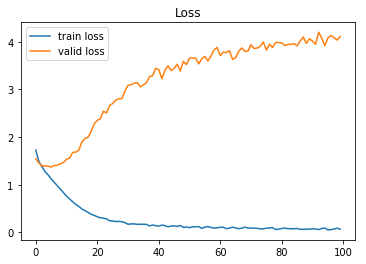

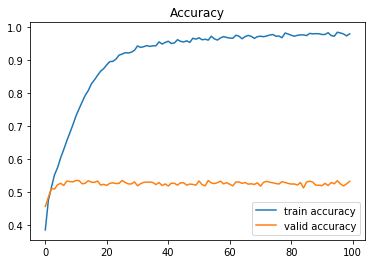

In [88]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()